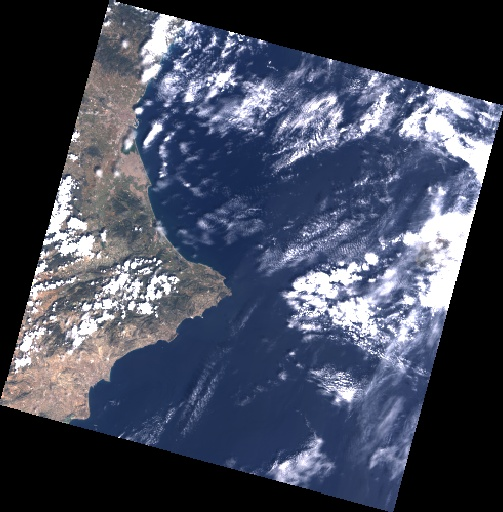

In [1]:
import ee
from ee_ipl_uv import normalization
from ee_ipl_uv import converters
from IPython.display import Image
from ee_ipl_uv import download

ee.Initialize()

im = ee.Image('LANDSAT/LC8_L1T_TOA/LC81980332015119LGN00').select(["B2","B3","B4"])
ftcol = im.sample(numPixels=10,seed=23)
ftcol_pd = converters.eeFeatureCollectionToPandas(ftcol)
ftcol_pd = ftcol_pd.drop(".geo",1)
descrip=ftcol_pd.describe()
img_file = download.MaybeDownloadThumb(im, {"bands":"B4,B3,B2", "max":.3,"min":0})
Image(img_file)

In [2]:
ftcol_pd

,B2,B3,B4
system:index,,,
0,0.759833,0.730852,0.764479
1,0.104437,0.062653,0.043633
2,0.106517,0.073215,0.053363
3,0.145805,0.099353,0.081511
4,0.103721,0.060434,0.038757
5,0.126947,0.079062,0.061105
6,0.197204,0.156506,0.145713
7,0.129720,0.117472,0.127848
8,0.270233,0.238710,0.236353


In [3]:
ftcol_norm, mean, std = normalization.ComputeNormalizationFeatureCollection(ftcol,["B2","B3","B4"])
converters.eeFeatureCollectionToPandas(ftcol_norm)

,B2,B3,B4,.geo
system:index,,,,
0,2.889717,2.884568,2.877169,NaN
1,-0.580175,-0.598739,-0.609980,NaN
2,-0.569163,-0.543682,-0.562912,NaN
3,-0.361158,-0.407424,-0.426740,NaN
4,-0.583968,-0.610305,-0.633570,NaN
5,-0.461000,-0.513201,-0.525459,NaN
6,-0.089038,-0.109488,-0.116160,NaN
7,-0.446318,-0.312971,-0.202581,NaN
8,0.297606,0.319043,0.322319,NaN


In [4]:
print(mean.getInfo())
print(descrip.loc["mean"])
print(std.getInfo())

# Convert sample sd from pandas to sd (change)
print(descrip.loc["std"]*(9./10.)**(1/2.))

{u'B4': 0.16972489953041076, u'B2': 0.21402115374803543, u'B3': 0.17750857658684255}
B2    0.214021
B3    0.177509
B4    0.169725
Name: mean, dtype: float64
{u'B4': 0.20671485446493307, u'B2': 0.18888079426592552, u'B3': 0.19182902211883568}
B2    0.188881
B3    0.191829
B4    0.206715
Name: std, dtype: float64


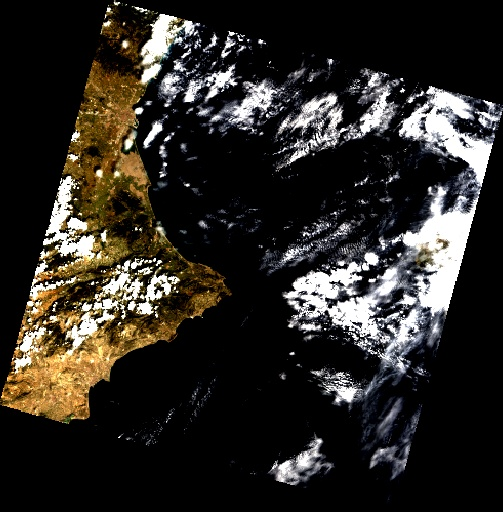

In [9]:
reload(normalization)

im_normalized = normalization.ApplyNormalizationImage(im,["B2","B3","B4"],mean,std)
img_file = download.MaybeDownloadThumb(im_normalized, {"bands":"B4,B3,B2", "max":.4,"min":-.4})
Image(img_file)

In [6]:
ftcol_sample = im_normalized.sample(numPixels=5,seed=10)
converters.eeFeatureCollectionToPandas(ftcol_sample)

,B2,B3,B4,.geo
system:index,,,,
0,-0.537228,-0.560669,-0.564589,NaN
1,-0.588006,-0.608738,-0.622613,NaN
2,0.326727,0.318200,0.367710,NaN
3,-0.245532,-0.339114,-0.330816,NaN
4,-0.521322,-0.541875,-0.546701,NaN


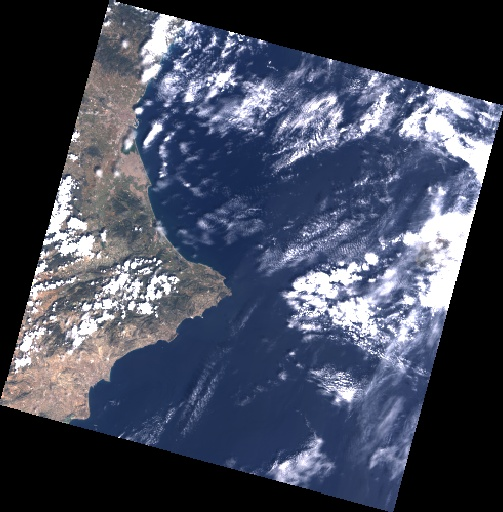

In [8]:
im_unnormalized = normalization.ApplyDenormalizationImage(im_normalized,["B2","B3","B4"],mean,std)
img_file = download.MaybeDownloadThumb(im_unnormalized, {"bands":"B4,B3,B2", "max":.3,"min":0})
Image(img_file)